## General Introduction for pymc3 and bayesian inference
* https://www.pymc.io/projects/docs/en/latest/learn/core_notebooks/pymc_overview.html
* https://www.pymc.io/projects/docs/en/latest/learn/books.html


In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

Text(0.5, 0, 'X2')

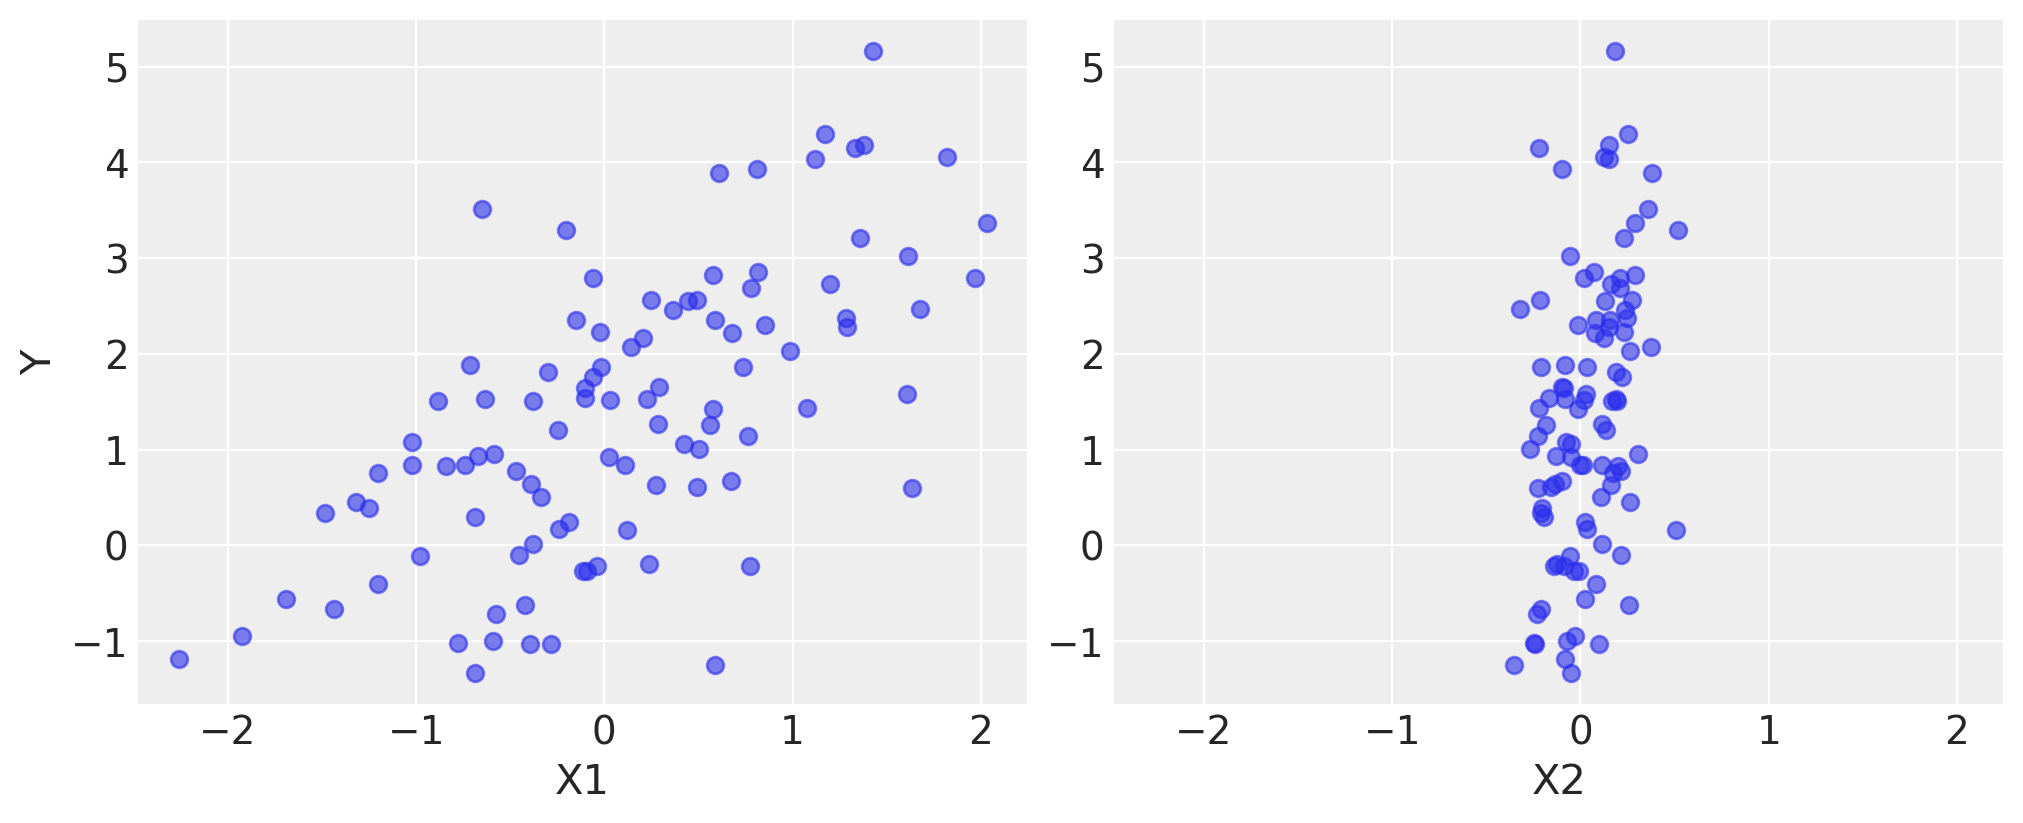

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2") 
# simulated from true parameters

### Model Specification
* 위에서 진짜 파라미터를 이용해 random variable X1, X2로부터 Y를 생성했다.
* 여기서부터는 모델을 활용해, parameter를 찾는 과정.

In [7]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.9.2


In [8]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [9]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [10]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [11]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.22632652, 1.15108692, 1.34015802, 0.99207702, 1.19011558],
       [1.19453495, 1.19059223, 1.12505139, 1.10116841, 1.02075644],
       [1.1175389 , 1.08328858, 1.1898649 , 1.1898649 , 1.1898649 ],
       [1.17436407, 1.09330645, 1.2662069 , 1.13523931, 1.26275652]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4

In [12]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 5 seconds.


### Posterior analysis

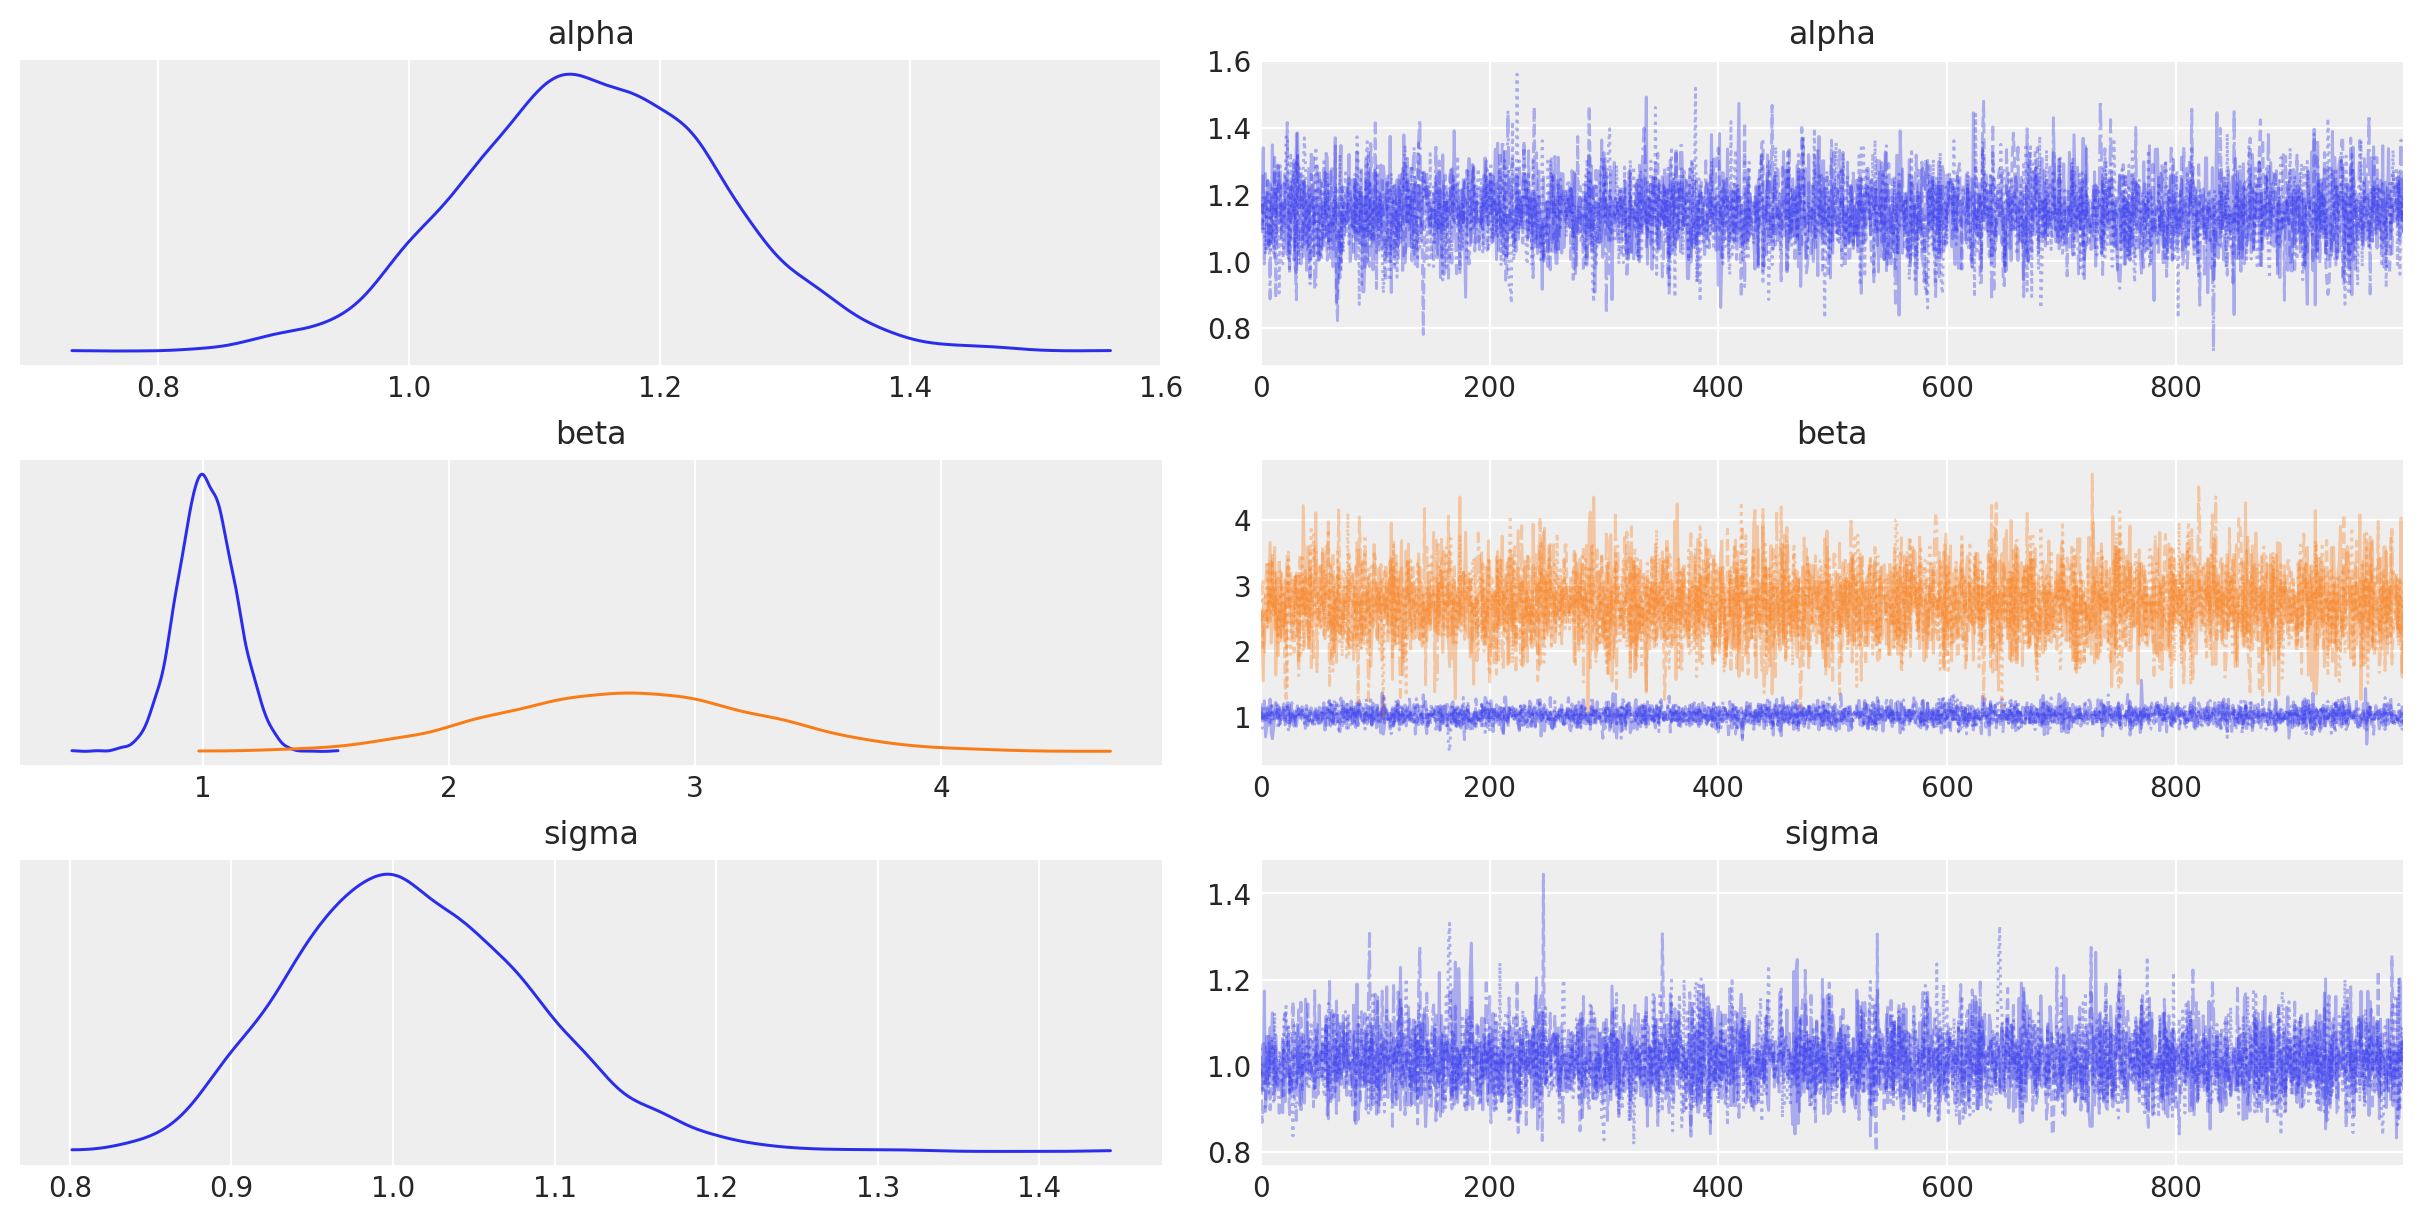

In [13]:
az.plot_trace(idata, combined=True);

In [14]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.15,0.10,0.97,1.35,0.00,0.00,5063.17,3452.63,1.0
beta[0],1.02,0.11,0.80,1.23,0.00,0.00,5964.87,3189.47,1.0
beta[1],2.73,0.53,1.73,3.71,0.01,0.01,5321.67,3089.99,1.0
sigma,1.01,0.07,0.88,1.15,0.00,0.00,5675.61,3278.05,1.0


### Case Study
* 아래쪽은 실제로 적용해본 예제들.
* 생략.